In [1]:
#import required packages
import numpy as np
import keras
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras.models import *
from keras.layers import *
from keras.callbacks import EarlyStopping as ES #ES(monitor='val_loss', min_delta=0.11, patience=5, verbose=0, mode='max')
from keras.preprocessing.image import ImageDataGenerator
import csv
import matplotlib.pyplot as plt
import pickle
from keras.utils import plot_model
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
%matplotlib inline

#Required variable Definitions
batchsize = 50
nepoch = 50


In [4]:
#Function definitions

def image_func(img):  
	#pre processing. _ Did not work. Worked for training but on simulator complained about shape of input. 
	#Was meant to add extra layer to input image of Canny transform so that gradiest are taken into consideration during training to provide better accuracy.
	img2=cv2.Canny(img,threshold1=200,threshold2=200) 
	img3=np.concatenate((img,np.reshape(img2,(160,320,1))),axis=2)
	print(np.asarray(img3).shape)
	yield img3

#load database
def load_data():
	[X_train,Y_train]=pickle.load(open('/home/carnd/CarND/data3.p','rb'))

	#to load data from the training images since large, use pickle file.
	'''
	lines=[]
	with open('/home/carnd/CarND/ot/driving_log.csv') as csvfile:
		reader = csv.reader(csvfile)
		for line in reader:
			lines.append(line)
	images=[]
	measurements = []
	for line in lines:
		for i in range(3):
			source_path=line[i]
			filename=source_path.split('\\')[-1]
			current_path='/home/carnd/CarND/ot/IMG/'+ filename
			image=cv2.imread(current_path)
			images.append(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
			if i ==0:
				measurement = float(line[3])
				measurements.append(measurement)
			if i ==1:
				measurement = float(line[3])+0.15
				measurements.append(measurement)
			if i==2:
				measurement = float(line[3]) -0.15
				measurements.append(measurement)
	X_train =np.array(images)
	Y_train = np.array(measurements)
	'''
	print(X_train.shape,Y_train.shape)
	return X_train,Y_train

In [5]:
if __name__ == '__main__':
	print("loading data")
	X_train,Y_train=load_data()
	
	#print("Augmentation") #pre-processing : Normalize   
	#this part didnt work kept giving memory error due to large dataset.
	#datagen = ImageDataGenerator(samplewise_std_normalization=True)	
	#datagen.fit(np.asarray(X_train))

	print("splitting data")
	(XTrain,XVal,YTrain,YVal)=train_test_split(X_train,Y_train,test_size=0.2,random_state=666)
	
	'''
	Attempt1 - Implementation of modified Alexnet Layer pattern.
	(oringinal Alexnet layer information from : https://github.com/dmlc/minerva/wiki/Walkthrough:-AlexNet)
	5 (Conv) + 1 (dropout) + 3 (Full) layers
	Layer 1 - Convolution2D 
				Max
				Batch Normalization
	Layer 2 - Convolution2D
				Max
				Batch Normalization
	Layer 3 - Convolution2D
	Layer 4 - Convolution2D
	Layer 5 - Convolution2D
				Max

	Layer 6 - Dropout (to prevent overfitting)

	Layer 7 - Full (Dense)	
	Layer 8 - Full (Dense)	
	Layer 9 - Full (Dense)	

	Also, Callbacks implemented to monitor Validation accuracy to stop training if value stops increasing.

	'''
	#for Early stopping of model incase loss stopped decreasin in order of 0.001 0r 0.1 percent
	callbacks = [ES(monitor='loss', min_delta=0.001, patience=5, verbose=1, mode='min')]

	
	model = Sequential()
	model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=(160,320,3)))
	model.add(Cropping2D(cropping=((50,20), (0,0))))
	model.add(Convolution2D(96,11,11,subsample= (4,4),activation='relu'))
	model.add(ZeroPadding2D())
	model.add(MaxPooling2D(pool_size=(3,3),strides=(4,4)))
	model.add(ZeroPadding2D())
	model.add(BatchNormalization())
	model.add(Convolution2D(256,5,5,subsample= (1,1),activation='relu')) 
	model.add(ZeroPadding2D())
	model.add(MaxPooling2D(pool_size=(3,3),strides=(4,4)))
	model.add(ZeroPadding2D())
	model.add(BatchNormalization())
	model.add(Convolution2D(384,3,3,subsample= (1,1),activation='relu'))
	model.add(ZeroPadding2D())
	model.add(Convolution2D(384,3,3,subsample= (1,1),activation='relu'))
	model.add(ZeroPadding2D())
	model.add(Convolution2D(256,3,3,subsample= (1,1),activation='relu'))
	model.add(ZeroPadding2D())
	model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
	model.add(ZeroPadding2D())
	model.add(Flatten())
	model.add(Dense(4096, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(4096, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(1000, activation= 'relu'))
	model.add(Dense(1))
	model.summary()

loading data
(26523, 160, 320, 3) (26523,)
splitting data


/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:44: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (11, 11), activation="relu", strides=(4, 4))`
/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:49: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), activation="relu", strides=(1, 1))`
/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:54: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu", strides=(1, 1))`
/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:56: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(384, (3, 3), activation="relu", strides=(1, 1))`
/home/carnd/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:58: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu", strides=(1, 1))`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_1 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 78, 96)        34944     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 22, 80, 96)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 20, 96)         0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 7, 22, 96)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 7, 22, 96)         384       
__________

In [6]:
	print("training model")
	model.compile(loss='mse',optimizer='adam')
	history = model.fit(XTrain, YTrain, batch_size=batchsize,epochs=50, verbose=1, callbacks=callbacks, validation_data=(XVal, YVal))

training model
Train on 21218 samples, validate on 5305 samples
Epoch 1/50
21218/21218 [==============================] - 91s - loss: 0.0799 - val_loss: 0.0535
Epoch 2/50
21218/21218 [==============================] - 85s - loss: 0.0472 - val_loss: 0.0423
Epoch 3/50
21218/21218 [==============================] - 86s - loss: 0.0431 - val_loss: 0.0408
Epoch 4/50
21218/21218 [==============================] - 86s - loss: 0.0396 - val_loss: 0.0440
Epoch 5/50
21218/21218 [==============================] - 85s - loss: 0.0355 - val_loss: 0.0345
Epoch 6/50
21218/21218 [==============================] - 85s - loss: 0.0324 - val_loss: 0.0332
Epoch 7/50
21218/21218 [==============================] - 85s - loss: 0.0282 - val_loss: 0.0319
Epoch 8/50
21218/21218 [==============================] - 85s - loss: 0.0263 - val_loss: 0.0293
Epoch 9/50
21218/21218 [==============================] - 85s - loss: 0.0228 - val_loss: 0.0313
Epoch 10/50
21218/21218 [==============================] - 86s - loss: 0

[0.079906857962529512, 0.047175279312212895, 0.043097165690165952, 0.039585700474566402, 0.035456741245554611, 0.032444005575213986, 0.028160789824961823, 0.02627379839072503, 0.022834681197372361, 0.020580046495233279, 0.017977863171828132, 0.016619614826722317, 0.014517041119527486, 0.012962844762668464, 0.012109783500686143, 0.010652338463577098, 0.010132220256376619, 0.0095926349039489479, 0.0089063976338023126, 0.0080534239191486796, 0.0077155390752147428, 0.0076075636851585943, 0.0069179009336160736, 0.0066716086547107178, 0.0062585770945349237, 0.0061779609863872025, 0.0060729569023270863, 0.0057425760990807567, 0.0055854193464872975, 0.0049197209123474639, 0.0051454051289829793, 0.0048939168892432284, 0.0047149810069650154, 0.0051848614551378023, 0.0047832538864558388, 0.0043608512368737227, 0.0041055235110312137, 0.0043540528231176727, 0.0042043479065609103]
Saving Model
model saved
   ....    
End of Script


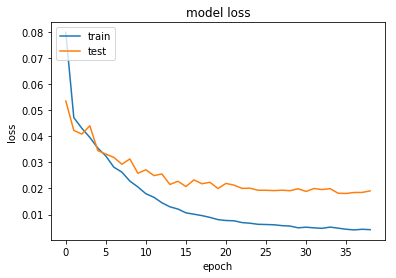

In [7]:
	plot_model(model, to_file='model.png', show_shapes='True')
	print(history.history['loss'])
	plt.plot(history.history['loss'])
	plt.plot(history.history['val_loss'])
	plt.title('model loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train','test'],loc='upper left')
	plt.savefig('lossHistory.png')
	print("Saving Model")
	model.save("model.h5")
	print("model saved")
	print("   ....    ")
	print("End of Script")

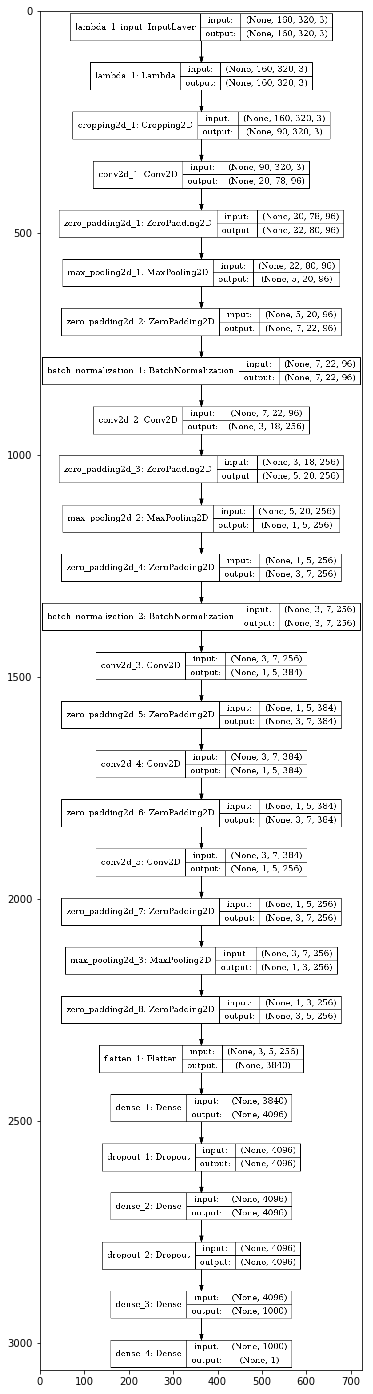

In [15]:
model_png=cv2.imread('model.png')
fig, ax = plt.subplots(figsize=(100, 25))
ax.imshow(model_png)